# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [69]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
!pip install bokeh==2.0.1
# Without --no-cache-dir, smaller aws instances may have trouble installing

### Setup Kaggle API Key

In [4]:
# create the .kaggle directory and an empty kaggle.json file
!pip install kaggle
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

  Using cached kaggle-1.6.3-py3-none-any.whl


In [5]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "emugabi"
kaggle_key = "ee1a6cf3573f5567148a77d75a7421c5"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms

In [6]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [7]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [8]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv", parse_dates=["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.

In [10]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv", parse_dates=["datetime"])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [11]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [12]:
train = train.drop(columns=['casual', 'registered'], errors='ignore')
predictor = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(train, time_limit=600, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20240126_034544"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240126_034544/ds_sub_fit/sub_fit_ho.
2024-01-26 03:45:45,260	INFO util.py:159 -- Outdated packages:
  ipywidgets==7.6.5 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
Beginning Aut

### Review AutoGluon's training run with ranking of models that did the best.

In [13]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.729375  root_mean_squared_error       2.898040  405.395451                0.003624           0.516861            3       True         11
1   RandomForestMSE_BAG_L2  -53.427006  root_mean_squared_error       2.228400  324.125571                0.585360          31.025528            2       True          8
2     ExtraTreesMSE_BAG_L2  -53.499662  root_mean_squared_error       2.239177  303.692967                0.596137          10.592923            2       True         10
3          CatBoost_BAG_L2  -55.406681  root_mean_squared_error       1.712919  363.260139                0.069879          70.160095            2       True          9
4    KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.059775    0.032436   

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -130.51837916327125,
  'ExtraTreesMSE_BAG_L1': -124.60067564699747,
  'NeuralNetFastAI_BAG_L1': -137.91113275380903,
  'WeightedEnsemble_L2': -84.12506123181602,
  'RandomForestMSE_BAG_L2': -53.42

### Create predictions from test dataset

In [14]:
# test.drop(columns=['casual', 'registered'])
predictions = predictor.predict(test)
predictions.head()

0    23.504013
1    40.665558
2    45.056835
3    47.652275
4    51.165527
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [15]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.644798
std        90.726418
min         2.505817
25%        19.245100
50%        63.025948
75%       168.618073
max       362.882935
Name: count, dtype: float64

In [71]:
# How many negative values do we have?
print(predictions[predictions < 0])

Series([], Name: count, dtype: float32)


In [17]:
# Set them to zero
predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [18]:
submission["count"] = predictions
print(submission["count"])
submission.to_csv("submission.csv", index=False)

In [19]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [20]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                                            status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------------------------  --------  -----------  ------------  
submission_new_features.csv  2024-01-24 19:52:07  fixed missing datetime in submission_new_features.csv  complete  0.71915      0.71915       
submission_new_features.csv  2024-01-24 19:36:47  new features                                           error                                
submission.csv               2024-01-24 18:33:09  first raw submission                                   complete  1.79553      1.79553       


#### Initial score of `1.79553`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>],
       [<AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'count'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

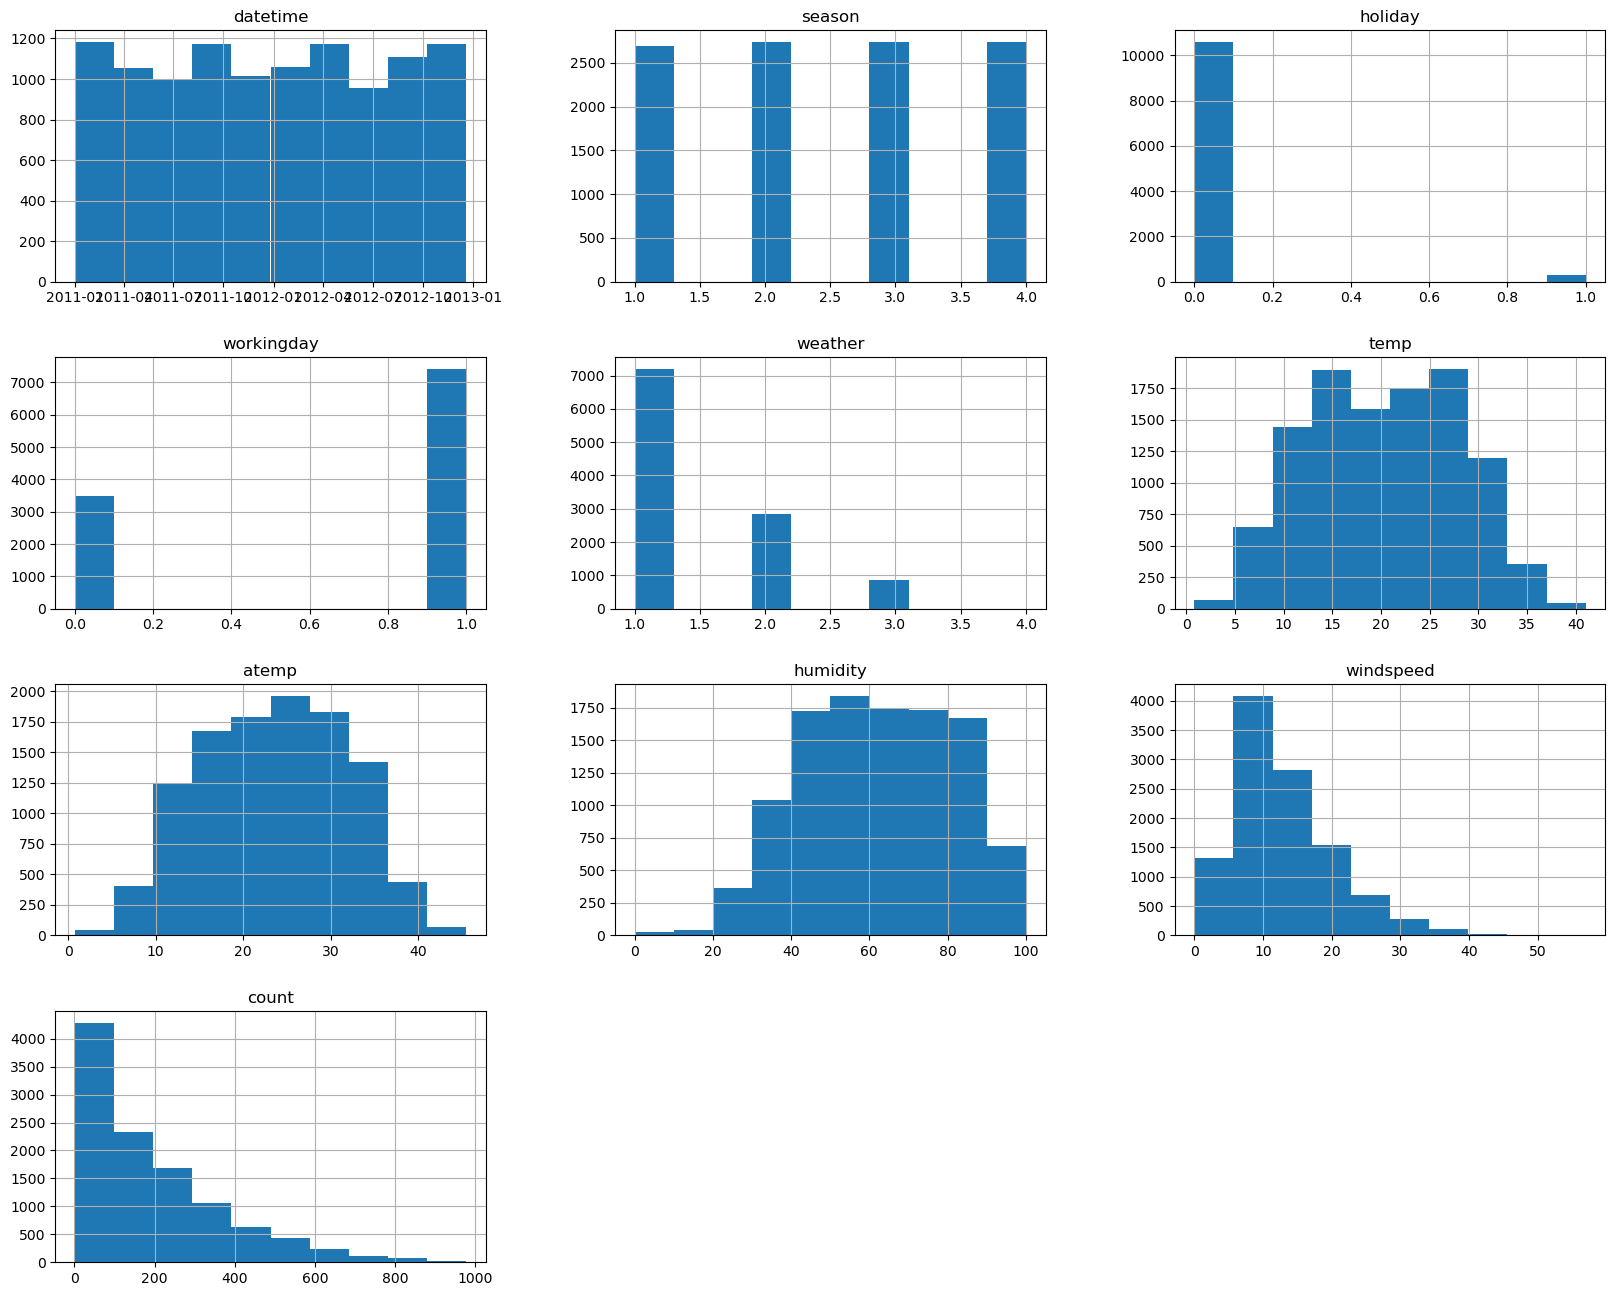

In [21]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(20, 16))

In [22]:
# create a new feature
# Split out into hour, day and month
train['hour'] = train['datetime'].dt.hour
train['date'] = train['datetime'].dt.date
train['month'] = train['datetime'].dt.month

train.head()

test['hour'] = test['datetime'].dt.hour
test['date'] = test['datetime'].dt.date
test['month'] = test['datetime'].dt.month

test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,date,month
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,2011-01-20,1
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,2011-01-20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,2011-01-20,1
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,2011-01-20,1
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,2011-01-20,1


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [23]:
train["season"] = train['season'].astype('category')
train["weather"] = train['weather'].astype('category')

print(train.dtypes)

test["season"] = test['season'].astype('category')
test["weather"] = test['weather'].astype('category')

print(test.dtypes)

datetime      datetime64[ns]
season              category
holiday                int64
workingday             int64
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
count                  int64
hour                   int32
date                  object
month                  int32
dtype: object
datetime      datetime64[ns]
season              category
holiday                int64
workingday             int64
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
hour                   int32
date                  object
month                  int32
dtype: object


In [24]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,date,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,0,2011-01-01,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1,2011-01-01,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2,2011-01-01,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,3,2011-01-01,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,4,2011-01-01,1


array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>],
       [<AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'count'}>,
        <AxesSubplot:title={'center':'hour'}>],
       [<AxesSubplot:title={'center':'month'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

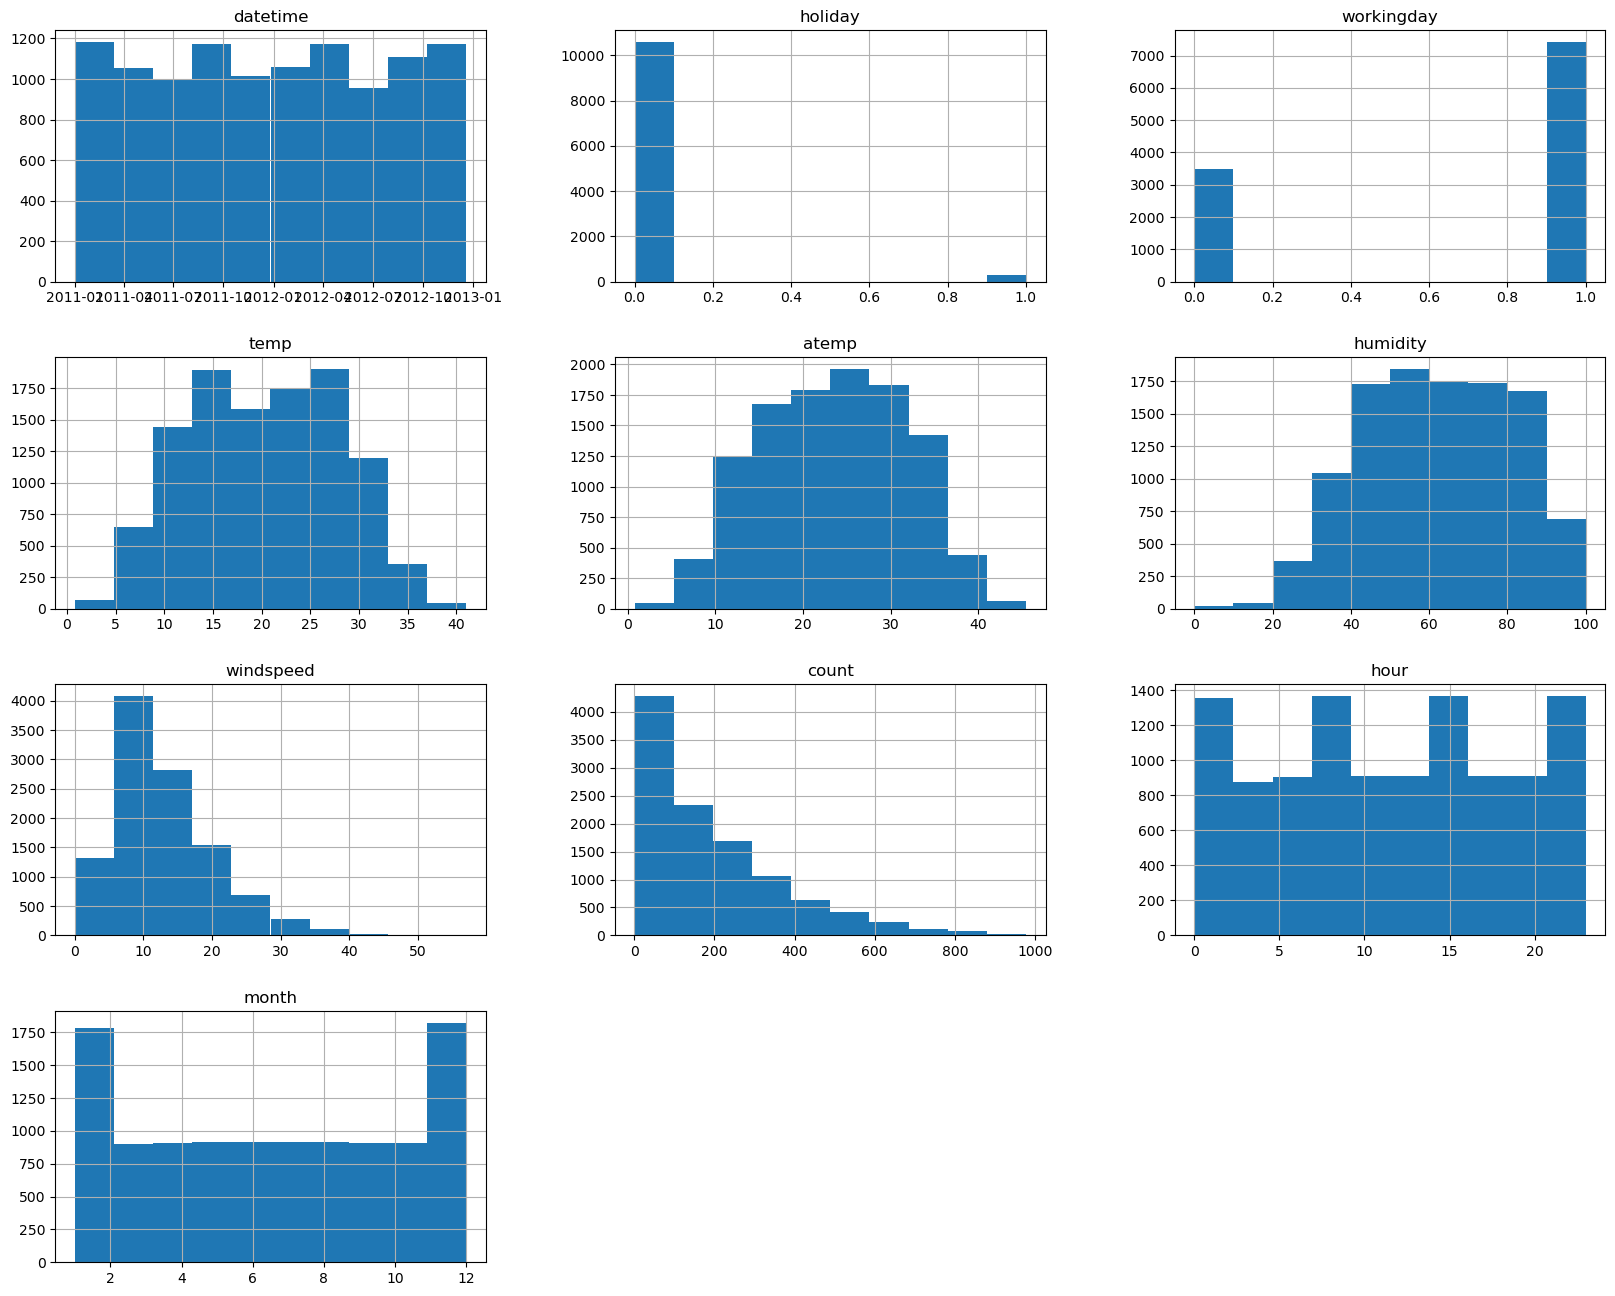

In [25]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(20, 16))

In [42]:
# Additional EDA 

# 1. Check Correlation between atemp and temp

correlation_coefficient = train['atemp'].corr(train['temp'])
print(correlation_coefficient)

print(train.columns)
# Drop datetime columns to allow computation of Correlation Matrix
train_without_date = train.drop(columns=["datetime", "date"])
train_without_date.corr()



0.9849481104817066
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'count', 'hour', 'date', 'month'],
      dtype='object')


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,month
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.163439,-0.006546,0.971524
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,-0.005393,-0.000354,0.001731
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,0.011594,0.002780,-0.003394
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.128655,-0.022740,0.012144
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.394454,0.145430,0.257589
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.389784,0.140343,0.264173
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.317371,-0.278011,0.204537
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.101369,0.146631,-0.150192
count,0.163439,-0.005393,0.011594,-0.128655,0.394454,0.389784,-0.317371,0.101369,1.000000,0.400601,0.166862
hour,-0.006546,-0.000354,0.002780,-0.022740,0.145430,0.140343,-0.278011,0.146631,0.400601,1.000000,-0.006818


In [43]:
# Given the correlation, drop the following columns from the dataset

columns_to_drop = ['casual', 'registered', 'season', 'temp', 'holiday', 'workingday']


## Step 5: Rerun the model with the same settings as before, just with more features

In [44]:


train = train.drop(columns=columns_to_drop, errors='ignore')
predictor_new_features = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(train, time_limit=600, presets='best_quality')



No path specified. Models will be saved in: "AutogluonModels/ag-20240126_044024"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240126_044024/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 171 seconds for the sub-fit(s) during dynamic stacking.
Time left for full fit of AutoGluon: 429 seconds.
Starting full fit now with num_stack_leve

In [45]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3  -31.841558  root_mean_squared_error       2.737553  385.314598                0.000567           0.458656            3       True         10
1         CatBoost_BAG_L2  -31.863561  root_mean_squared_error       2.060890  350.459170                0.081910          61.079429            2       True          9
2  RandomForestMSE_BAG_L2  -34.211839  root_mean_squared_error       2.655077  323.776514                0.676096          34.396772            2       True          8
3     WeightedEnsemble_L2  -36.213985  root_mean_squared_error       0.900556  232.642856                0.000792           0.336440            2       True          7
4         CatBoost_BAG_L1  -37.084975  root_mean_squared_error       0.223561  217.461415         

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -111.46060438458154,
  'KNeighborsDist_BAG_L1': -89.04856113825365,
  'RandomForestMSE_BAG_L1': -41.643687901548496,
  'CatBoost_BAG_L1': -37.08497538081752,
  'ExtraTreesMSE_BAG_L1': -42.102684564442285,
  'NeuralNetFastAI_BAG_L1': -104.3526916816602,
  'WeightedEnsemble_L2': -36.21398534425246,
  'RandomForestMSE_BAG_L2': -34.21183896893898,
  'CatBoost_BAG_L2': -31.863561154735734,

In [68]:
predictor_new_features.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-31.841558,root_mean_squared_error,2.737553,385.314598,0.000567,0.458656,3,True,10
1,CatBoost_BAG_L2,-31.863561,root_mean_squared_error,2.060890,350.459170,0.081910,61.079429,2,True,9
2,RandomForestMSE_BAG_L2,-34.211839,root_mean_squared_error,2.655077,323.776514,0.676096,34.396772,2,True,8
3,WeightedEnsemble_L2,-36.213985,root_mean_squared_error,0.900556,232.642856,0.000792,0.336440,2,True,7
4,CatBoost_BAG_L1,-37.084975,root_mean_squared_error,0.223561,217.461415,0.223561,217.461415,1,True,4
5,RandomForestMSE_BAG_L1,-41.643688,root_mean_squared_error,0.557508,14.797808,0.557508,14.797808,1,True,3
6,ExtraTreesMSE_BAG_L1,-42.102685,root_mean_squared_error,0.652982,7.245058,0.652982,7.245058,1,True,5
7,KNeighborsDist_BAG_L1,-89.048561,root_mean_squared_error,0.118696,0.047193,0.118696,0.047193,1,True,2
8,NeuralNetFastAI_BAG_L1,-104.352692,root_mean_squared_error,0.348088,49.770615,0.348088,49.770615,1,True,6
9,KNeighborsUnif_BAG_L1,-111.460604,root_mean_squared_error,0.078146,0.057652,0.078146,0.057652,1,True,1


In [53]:
# Remember to set all negative values to zero
test1 = test.drop(columns=columns_to_drop, errors='ignore')

predictions2 = predictor_new_features.predict(test1)

predictions2.head()

#predictions2.describe()

0    67.241684
1    33.147861
2    27.296759
3    17.171415
4    12.813740
Name: count, dtype: float32

In [47]:
# Same submitting predictions
submission_new_features = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])
submission_new_features.head()

#print(submission_new_features)
submission_new_features["count"] = predictions2
submission_new_features.to_csv("submission_new_features_with_dropped_columns.csv", index=False)

In [48]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "submission_new_features_with_dropped_columns"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 321kB/s]
Successfully submitted to Bike Sharing Demand

In [49]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                                            status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------------------------  --------  -----------  ------------  
submission_new_features.csv  2024-01-26 04:52:58  submission_new_features_with_dropped_columns           complete  0.73774      0.73774       
submission_new_features.csv  2024-01-24 19:52:07  fixed missing datetime in submission_new_features.csv  complete  0.71915      0.71915       
submission_new_features.csv  2024-01-24 19:36:47  new features                                           error                                
submission.csv               2024-01-24 18:33:09  first raw submission                                   complete  1.79553      1.79553       


#### New Score of `0.71915`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [54]:
predictor_new_hpo = TabularPredictor(
    label='count', 
    problem_type='regression',
    eval_metric='root_mean_squared_error'
                                    
).fit(
    train, 
    time_limit=600, 
    hyperparameters={'RF': {'n_estimators': 200, 'max_depth': 100}}, 
    hyperparameter_tune_kwargs={'num_trials': 60,'searcher': 'auto','scheduler':'local'},
    presets='best_quality',
)


No path specified. Models will be saved in: "AutogluonModels/ag-20240126_051552"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240126_051552/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 37 seconds for the sub-fit(s) during dynamic stacking.
Time left for full fit of AutoGluon: 563 seconds.
Starting full fit now with num_stack_level

In [55]:
predictor_new_hpo.fit_summary()
#
#

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L3 -41.725934  root_mean_squared_error       0.001724  27.202941                0.000544           0.137882            3       True          4
1  RandomForest_BAG_L1 -41.730427  root_mean_squared_error       0.000973  11.992633                0.000973          11.992633            1       True          1
2  WeightedEnsemble_L2 -41.730427  root_mean_squared_error       0.001589  11.996202                0.000616           0.003569            2       True          2
3  RandomForest_BAG_L2 -43.866205  root_mean_squared_error       0.001181  27.065060                0.000208          15.072427            2       True          3
Number of models trained: 4
Types of models trained:
{'StackerEnsembleModel_RF', 'WeightedEnsembleModel'}
Bagging used: Tru

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'RandomForest_BAG_L1': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'RandomForest_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'RandomForest_BAG_L1': -41.73042686990334,
  'WeightedEnsemble_L2': -41.73042686990334,
  'RandomForest_BAG_L2': -43.866204830199635,
  'WeightedEnsemble_L3': -41.72593396742596},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'RandomForest_BAG_L1': ['RandomForest_BAG_L1'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2'],
  'RandomForest_BAG_L2': ['RandomForest_BAG_L2'],
  'WeightedEnsemble_L3': ['WeightedEnsemble_L3']},
 'model_fit_times': {'RandomForest_BAG_L1': 11.992632865905762,
  'WeightedEnsemble_L2': 0.003568887710571289,
  'RandomForest_BAG_L2': 15.072426795959473,
  'WeightedEnsemble_L3': 0.13788151741027832},
 'model_pred_times': {'RandomForest_BAG_L1': 0.0009729862213134766,
  'WeightedEnsemble_L2': 0.0006158351898193359,
  'R

In [67]:
# Remember to set all negative values to zero
# ?

test3 = test.drop(columns=columns_to_drop, errors='ignore')

predictions3 = predictor_new_hpo.predict(test3)

predictions3.head()

predictions3.describe()

count    6493.000000
mean      196.434052
std       174.257874
min         2.205870
25%        53.105873
50%       154.269348
75%       288.571960
max       894.654785
Name: count, dtype: float64

In [58]:
submission_new_hpo = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])
submission_new_hpo.head()

# Same submitting predictions
submission_new_hpo["count"] = predictions3
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [59]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 345kB/s]
Successfully submitted to Bike Sharing Demand

In [61]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 10

fileName                     date                 description                                            status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-01-26 05:26:35  new features with hyperparameters                      complete  0.50556      0.50556       
submission_new_features.csv  2024-01-26 04:52:58  submission_new_features_with_dropped_columns           complete  0.73774      0.73774       
submission_new_features.csv  2024-01-24 19:52:07  fixed missing datetime in submission_new_features.csv  complete  0.71915      0.71915       
submission_new_features.csv  2024-01-24 19:36:47  new features                                           error                                
submission.csv               2024-01-24 18:33:09  first raw submission                                   complete  1.79553      1.79553       

#### New Score of `0.50556`

### Hyperparameter 2

In [80]:
# Hyperparameter #2

# Introduce Day Of The Week 

train_X = pd.read_csv("train.csv", parse_dates=["datetime"])

train_X['day_of_week'] = train_X['datetime'].dt.dayofweek
train_X['hour'] = train_X['datetime'].dt.hour
train_X['date'] = train_X['datetime'].dt.date
train_X['month'] = train_X['datetime'].dt.month

train_X["season"] = train_X['season'].astype('category')
train_X["weather"] = train_X['weather'].astype('category')


predictor_new_hpo2 = TabularPredictor(
    label='count', 
    problem_type='regression',
    eval_metric='root_mean_squared_error'
                                    
).fit(
    train_X.drop(columns=columns_to_drop, errors='ignore'), 
    time_limit=600, 
    hyperparameters={'RF': {}}, 
    hyperparameter_tune_kwargs={'num_trials': 20,'searcher': 'random','scheduler':'local'},
    presets='best_quality',
)

predictor_new_hpo2.fit_summary()
test['day_of_week'] = test['datetime'].dt.dayofweek
predictions_hpo2 = predictor_new_hpo2.predict(test.drop(columns=columns_to_drop, errors='ignore'))

predictions_hpo2.head()

predictions_hpo2.describe()




No path specified. Models will be saved in: "AutogluonModels/ag-20240126_113620"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240126_113620/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 49 seconds for the sub-fit(s) during dynamic stacking.
Time left for full fit of AutoGluon: 551 seconds.
Starting full fit now with num_stack_level

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L3 -41.660190  root_mean_squared_error       0.001276  32.709220                0.000680           0.152180            3       True          4
1  RandomForest_BAG_L1 -41.746614  root_mean_squared_error       0.000397   7.926902                0.000397           7.926902            1       True          1
2  WeightedEnsemble_L2 -41.746614  root_mean_squared_error       0.001276   7.930783                0.000879           0.003881            2       True          2
3  RandomForest_BAG_L2 -43.245391  root_mean_squared_error       0.000597  32.557039                0.000199          24.630137            2       True          3
Number of models trained: 4
Types of models trained:
{'StackerEnsembleModel_RF', 'WeightedEnsembleModel'}
Bagging used: Tru

count    6493.000000
mean      196.434052
std       174.257874
min         2.205870
25%        53.105873
50%       154.269348
75%       288.571960
max       894.654785
Name: count, dtype: float64

In [84]:
#predictions and submit to Kaggle
submission_hpo2 = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])

submission_new_features["count"] = predictions_hpo2
submission_new_features.to_csv("submission_submission_hpo2.csv", index=False)

In [87]:
!kaggle competitions submit -c bike-sharing-demand -f submission_submission_hpo2.csv -m "hyperparameters v2 - with correct filename"

100%|████████████████████████████████████████| 188k/188k [00:02<00:00, 72.3kB/s]
Successfully submitted to Bike Sharing Demand

In [88]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 10

fileName                        date                 description                                            status    publicScore  privateScore  
------------------------------  -------------------  -----------------------------------------------------  --------  -----------  ------------  
submission_submission_hpo2.csv  2024-01-26 13:22:45  hyperparameters v2 - with correct filename             complete  0.50382      0.50382       
submission_new_features.csv     2024-01-26 13:17:35  hyperparameters v2                                     complete  0.73774      0.73774       
submission_new_hpo.csv          2024-01-26 05:26:35  new features with hyperparameters                      complete  0.50556      0.50556       
submission_new_features.csv     2024-01-26 04:52:58  submission_new_features_with_dropped_columns           complete  0.73774      0.73774       
submission_new_features.csv     2024-01-24 19:52:07  fixed missing datetime in submission_new_features.csv  complete  0.7191

### Hyperparameter #3

In [89]:
# Hyperparameter #3

# Introduce Day Of The Week 

train_X3 = pd.read_csv("train.csv", parse_dates=["datetime"])

train_X3['day_of_week'] = train_X3['datetime'].dt.dayofweek
train_X3['hour'] = train_X3['datetime'].dt.hour
train_X3['date'] = train_X3['datetime'].dt.date
train_X3['month'] = train_X3['datetime'].dt.month

train_X3["season"] = train_X3['season'].astype('category')
train_X3["weather"] = train_X3['weather'].astype('category')


predictor_new_hpo3 = TabularPredictor(
    label='count', 
    problem_type='regression',
    eval_metric='root_mean_squared_error'
                                    
).fit(
    train_X3.drop(columns=columns_to_drop, errors='ignore'), 
    num_bag_folds=5, 
    num_bag_sets=1, 
    num_stack_levels=1,
    time_limit=600, 
    hyperparameters={'RF': {}}, 
    hyperparameter_tune_kwargs={'num_trials': 20,'searcher': 'random','scheduler':'local'},
    presets='best_quality',
)


predictor_new_hpo3.fit_summary()
test['day_of_week'] = test['datetime'].dt.dayofweek

predictions_hpo3 = predictor_new_hpo3.predict(test.drop(columns=columns_to_drop, errors='ignore'))

predictions_hpo3.head()

#predictions and submit to Kaggle
submission_hpo3 = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])

submission_hpo3["count"] = predictions_hpo3
submission_hpo3.to_csv("submission_hpo3.csv", index=False)

!kaggle competitions submit -c bike-sharing-demand -f submission_hpo3.csv -m "hyperparameters v3 - added num_bag_* parameters"

!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 10

No path specified. Models will be saved in: "AutogluonModels/ag-20240126_133036"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=5, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240126_133036/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 51 seconds for the sub-fit(s) during dynamic stacking.
Time left for full fit of AutoGluon: 549 seconds.
Starting full fit now with num_stack_level

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L3 -41.558487  root_mean_squared_error       0.001255  32.751201                0.000848           0.260852            3       True          4
1  RandomForest_BAG_L1 -41.679652  root_mean_squared_error       0.000201   8.994116                0.000201           8.994116            1       True          1
2  WeightedEnsemble_L2 -41.679652  root_mean_squared_error       0.000829   8.998343                0.000627           0.004227            2       True          2
3  RandomForest_BAG_L2 -42.975184  root_mean_squared_error       0.000407  32.490349                0.000206          23.496233            2       True          3
Number of models trained: 4
Types of models trained:
{'StackerEnsembleModel_RF', 'WeightedEnsembleModel'}
Bagging used: Tru

In [90]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 10

fileName                        date                 description                                            status    publicScore  privateScore  
------------------------------  -------------------  -----------------------------------------------------  --------  -----------  ------------  
submission_hpo3.csv             2024-01-26 13:32:05  hyperparameters v3 - added num_bag_* parameters        complete  0.50393      0.50393       
submission_submission_hpo2.csv  2024-01-26 13:22:45  hyperparameters v2 - with correct filename             complete  0.50382      0.50382       
submission_new_features.csv     2024-01-26 13:17:35  hyperparameters v2                                     complete  0.73774      0.73774       
submission_new_hpo.csv          2024-01-26 05:26:35  new features with hyperparameters                      complete  0.50556      0.50556       
submission_new_features.csv     2024-01-26 04:52:58  submission_new_features_with_dropped_columns           complete  0.7377

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

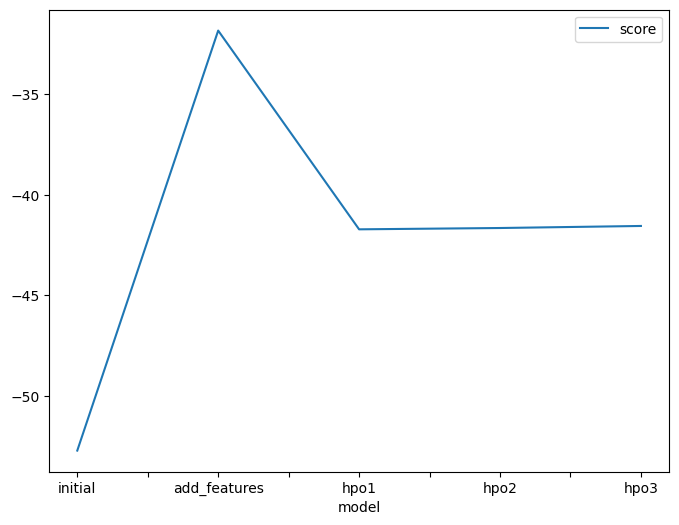

In [91]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo1", "hpo2", "hpo3"],
        "score": [-52.729375, -31.841558, -41.725934, -41.660190, -41.558487]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

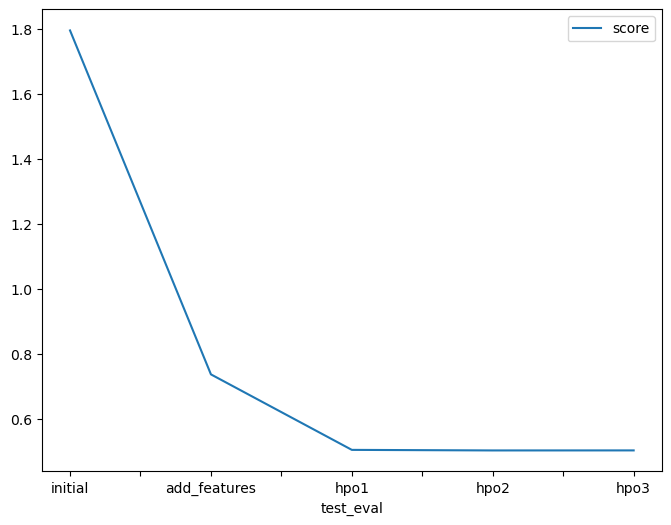

In [93]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo1", "hpo2", "hpo3"],
        "score": [1.79553, 0.73774, 0.50556, 0.50382, 0.50393 ]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [96]:
# The 3 hyperparameters we tuned with the kaggle score as the result
# -41.660190
pd.DataFrame({
    "model": ["initial", "add_features", "hpo1", "hpo2", "hpo3"],
    "num_trials": ["-", "-", 60, 20, 20],
    "searcher": ["-", "-", "local", "local","local"],
    "scheduler": ["-", "-", "auto", "random","random"],
    "score": [1.79553, 0.73774, 0.50556, 0.50382, 0.50393]
})

,model,num_trials,searcher,scheduler,score
0,initial,-,-,-,1.79553
1,add_features,-,-,-,0.73774
2,hpo1,60,local,auto,0.50556
3,hpo2,20,local,random,0.50382
4,hpo3,20,local,random,0.50393
